In [1]:
import os
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import train

In [2]:
symbol = 'MSFT'
ticker = yf.Ticker(symbol)

In [3]:
data = ticker.history(start='2010-11-01',
                      end='2023-12-21',
                      actions=True,
                      auto_adjust=True,
                      back_adjust=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3294 entries, 2010-11-01 00:00:00-04:00 to 2023-12-01 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3294 non-null   float64
 1   High          3294 non-null   float64
 2   Low           3294 non-null   float64
 3   Close         3294 non-null   float64
 4   Volume        3294 non-null   int64  
 5   Dividends     3294 non-null   float64
 6   Stock Splits  3294 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 205.9 KB


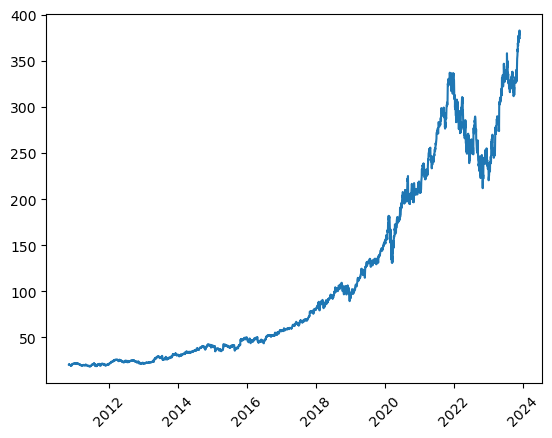

In [4]:
plt.plot(data['Close'])
plt.xticks(rotation=45)
plt.show()

In [5]:
percent_1d = (data['Close'].iloc[1:].reset_index(drop=True)-data['Close'].iloc[:-1].reset_index(drop=True))/(data['Close'].iloc[:-1].reset_index(drop=True))
vpercent_1d = (data['Volume'].iloc[1:].reset_index(drop=True)-data['Volume'].iloc[:-1].reset_index(drop=True))/(data['Volume'].iloc[:-1].reset_index(drop=True))

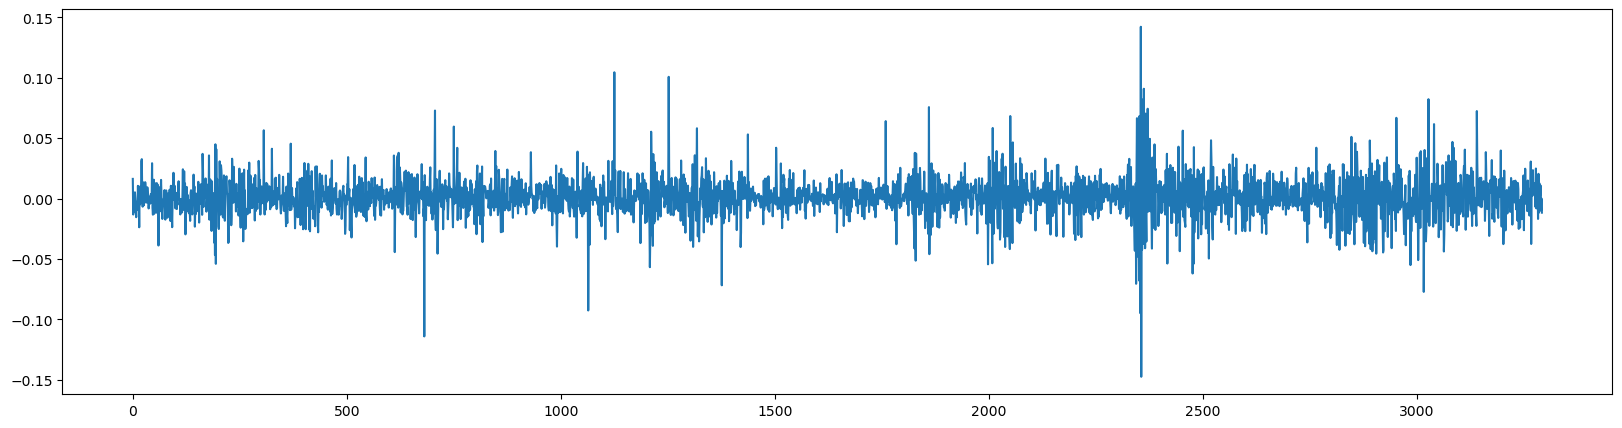

In [6]:
plt.figure(figsize=(20,5))
plt.plot(percent_1d)
plt.show()

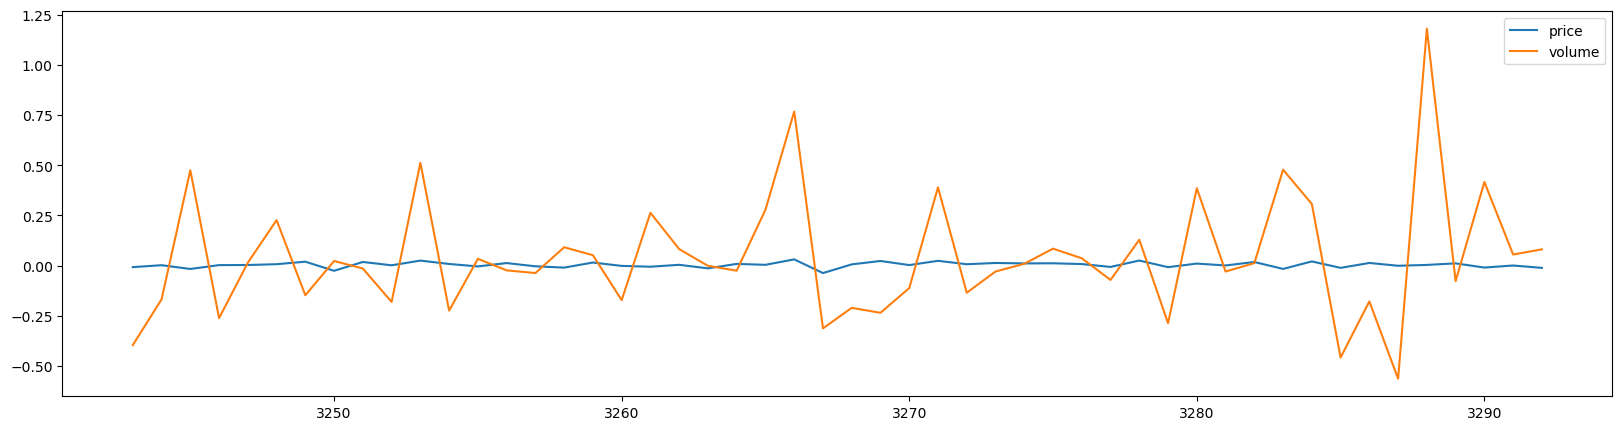

In [7]:
plt.figure(figsize=(20,5))
plt.plot(percent_1d[-50:],label='price')
plt.plot(vpercent_1d[-50:],label='volume')
plt.legend()
plt.show()

In [8]:
percent_1d.index = data.index[1:]
vpercent_1d.index = data.index[1:]

In [9]:
data['percent_1d'] = percent_1d #data['Close']
data['vpercent_1d'] = vpercent_1d# data['Volume']

In [10]:
traindata = data['percent_1d'].iloc[:-60]
valdata = data['percent_1d'].iloc[-60:-30]
testdata = data['percent_1d'].iloc[-30:]
trainprice = pd.concat([traindata.shift(5),traindata.shift(4),traindata.shift(3),traindata.shift(2),traindata.shift(1),traindata],axis=1).dropna()
valprice = pd.concat([valdata.shift(5),valdata.shift(4),valdata.shift(3),valdata.shift(2),valdata.shift(1),valdata],axis=1).dropna()
testprice = pd.concat([testdata.shift(5),testdata.shift(4),testdata.shift(3),testdata.shift(2),testdata.shift(1),testdata],axis=1).dropna()

In [11]:
traindata = data['vpercent_1d'].iloc[:-60]
valdata = data['vpercent_1d'].iloc[-60:-30]
testdata = data['vpercent_1d'].iloc[-30:]
trainvolume = pd.concat([traindata.shift(5),traindata.shift(4),traindata.shift(3),traindata.shift(2),traindata.shift(1),traindata],axis=1).dropna()
valvolume = pd.concat([valdata.shift(5),valdata.shift(4),valdata.shift(3),valdata.shift(2),valdata.shift(1),valdata],axis=1).dropna()
testvolume = pd.concat([testdata.shift(5),testdata.shift(4),testdata.shift(3),testdata.shift(2),testdata.shift(1),testdata],axis=1).dropna()

In [13]:
trainprice.columns = ['p1','p2','p3','p4','p5','y']
valprice.columns = ['p1','p2','p3','p4','p5','y']
testprice.columns = ['p1','p2','p3','p4','p5','y']

trainvolume.columns = ['v1','v2','v3','v4','v5','y']
valvolume.columns = ['v1','v2','v3','v4','v5','y']
testvolume.columns = ['v1','v2','v3','v4','v5','y']

In [14]:
valresult,testresult = train.train(trainprice,trainvolume,valprice,valvolume,testprice,testvolume,learning_rate=0.01,device='cuda')

Epoch: 0 validation loss: 0.648
Epoch: 50 validation loss: 0.66
Epoch: 100 validation loss: 0.668
Epoch: 150 validation loss: 0.668
Epoch: 200 validation loss: 0.668
Epoch: 250 validation loss: 0.668
Epoch: 300 validation loss: 0.668
Epoch: 350 validation loss: 0.668
Epoch: 400 validation loss: 0.668
Epoch: 450 validation loss: 0.668
Epoch: 500 validation loss: 0.668
Epoch: 550 validation loss: 0.668
Epoch: 600 validation loss: 0.668
Epoch: 650 validation loss: 0.668
Epoch: 700 validation loss: 0.668
Epoch: 750 validation loss: 0.668
Epoch: 800 validation loss: 0.668
Epoch: 850 validation loss: 0.668
Epoch: 900 validation loss: 0.668
Epoch: 950 validation loss: 0.668
Epoch: 999 test loss: 0.942


In [21]:
import numpy as np

In [24]:
np.mean((testresult[0] > 0)==(np.array(testresult[1]) > 0))

0.52

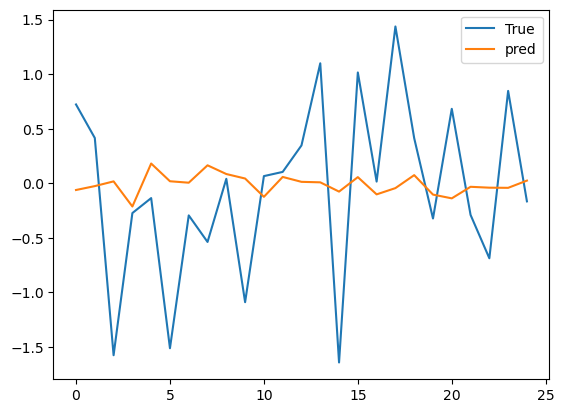

In [15]:
plt.plot(valresult[0],label='True')
plt.plot(valresult[1],label='pred')
plt.legend()

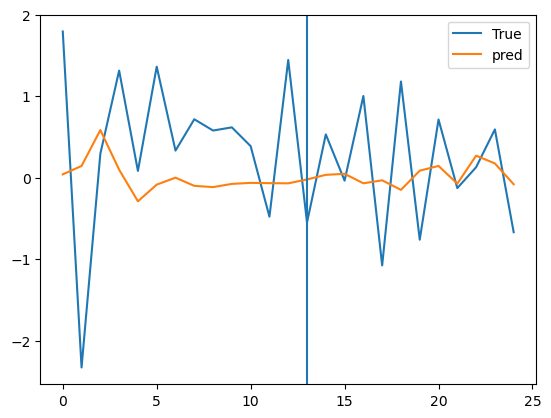

In [16]:
plt.plot(testresult[0],label='True')
plt.plot(testresult[1],label='pred')
plt.axvline(13)
plt.legend()